# Lineare Regression
Als erstes wird der Versuch unternommen, eine lineare Regression auf den Datenwerten hinzubekommen. Allerdings sind die Daten viel zu ungleichmässig, als dass einer linearen Regression eine Vorhersage gelingen könnte. Dementsprechend wird eine Hervorsagegenauigkeit von nur maximal 0.2 erreicht. Unten ein Bild wie wir die Auslastung der Parkäuser erwarten:
y = Auslasung des Parkhauses
x = Zeit (24 Stunden eines Tages)
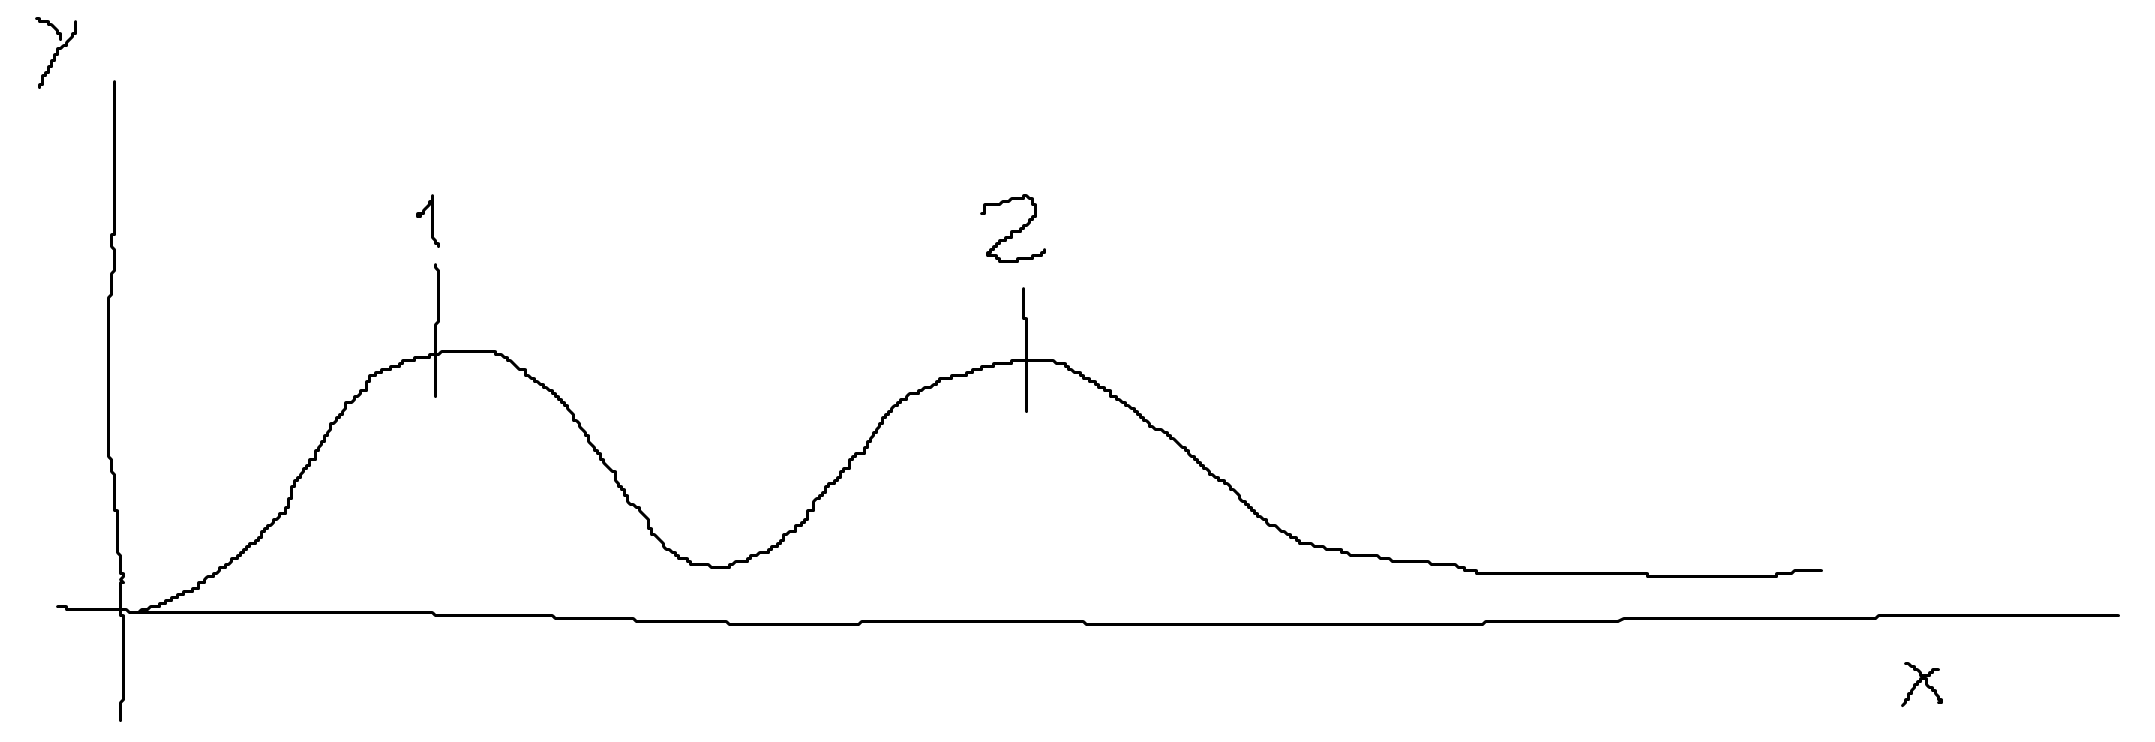

Den Peak 1 erwarten wir um die Mittagszeit und Peak 2 vor dem Abend. Weil das Resultat unbefriedigend war, entschied sich das Team den Algorithmus "random forest" auszuprobieren. Dieser sollte auf eine solch ungleichmässige Verteilung in der Theorie besser reagieren können. Dementsprechend sollte die Genauigkeit der Testdaten auch steigen. Mehr dazu im File 2b-train-randomforest.ipynb.

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_pickle("./data.pkl")

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

for parkingid in df['parking_id'].unique():
    data = df[df['parking_id'] == parkingid]
    X = data[['day_of_month', 'day_of_week', 'month', 'is_weekend', 'daypart_cat']]
    y = data['free_parking_0']
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 80% training and 20% test
    print(y_train.shape)
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    print(parkingid)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

(13812,)
central
Coefficients: 
 [ 0.04816772  0.18420293 -0.34589806 -6.87631625  0.19074681]
Mean squared error: 170.42
Coefficient of determination: 0.07
(13812,)
accu
Coefficients: 
 [ 0.38670066 -0.02278292  6.96809937  0.54755574  0.29625289]
Mean squared error: 38.11
Coefficient of determination: 0.37
(13812,)
albisriederplatz
Coefficients: 
 [ 0.04720081 -0.61636675  1.48751203  1.59895824  1.01270694]
Mean squared error: 79.50
Coefficient of determination: 0.05
(13812,)
bleicherweg
Coefficients: 
 [ 0.37120297  0.12260314 -6.18428136 29.62979031  3.8551045 ]
Mean squared error: 2081.03
Coefficient of determination: 0.12
(13812,)
center_11
Coefficients: 
 [  0.94543101   0.86804765 -10.06892013   4.96381583   3.60730638]
Mean squared error: 1556.87
Coefficient of determination: 0.07
(13812,)
cp
Coefficients: 
 [ 1.94698204  1.76334087 23.28463449 20.20458348 20.07543164]
Mean squared error: 23260.86
Coefficient of determination: 0.05
(13812,)
cityport
Coefficients: 
 [ 0.538572

# Weitere Tests mit Parkhaus Opera
Es wurde versucht mittels dem Parkhaus Opera die Performance zu erhöhen, in dem die Prozentuale auslastung berechnet wurde. Dies weil festgestellt wurde, dass die Modelle vorallem von grösseren Parkhäusern ungenauer waren. Dies weil wahrscheinlich die Fehlerspanne grösser ist. Leider hat dies auch nicht die erhoffte wirkung erbracht.

In [4]:
data = df[df['parking_id'] == 'opera']
data['free_in_percent'] = 100 / 299 * data['free_parking_0']

X = data[['day_of_month', 'day_of_week', 'month', 'is_weekend', 'daypart_cat']]
y = data['free_in_percent']
    
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 80% training and 20% test

<ipython-input-4-d3b2614cd73d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['free_in_percent'] = 100 / 299 * data['free_parking_0']


In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#print(parkingid)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
    % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
    % r2_score(y_test, y_pred))

Coefficients: 
 [0.26972122 0.35550747 2.6504874  2.19180159 3.68041113]
Mean squared error: 674.16
Coefficient of determination: 0.06
